In [15]:
import pandas as pd
import missingno as msno


In [16]:
input_df = pd.read_csv("Retail_Data_v4_unclean.csv")

In [17]:
input_df

,Age,Gender,Married,Salary,Annual Spend
0,28.2,Male,Single,26908.95,331.56
1,43.5,Female,Married,39366.44,3071.18
2,27.7,Female,Single,NaN,1357.19
3,18.9,Male,Single,26235.55,769.78
4,18.0,Male,Single,30822.14,100.00
...,...,...,...,...,...
10242,23.8,Female,Single,24218.53,1779.65
10243,26.6,Female,Single,26793.32,2352.41
10244,22.1,Male,Single,29096.49,410.25
10245,23.0,Female,Single,23437.99,1945.92


<Axes: >

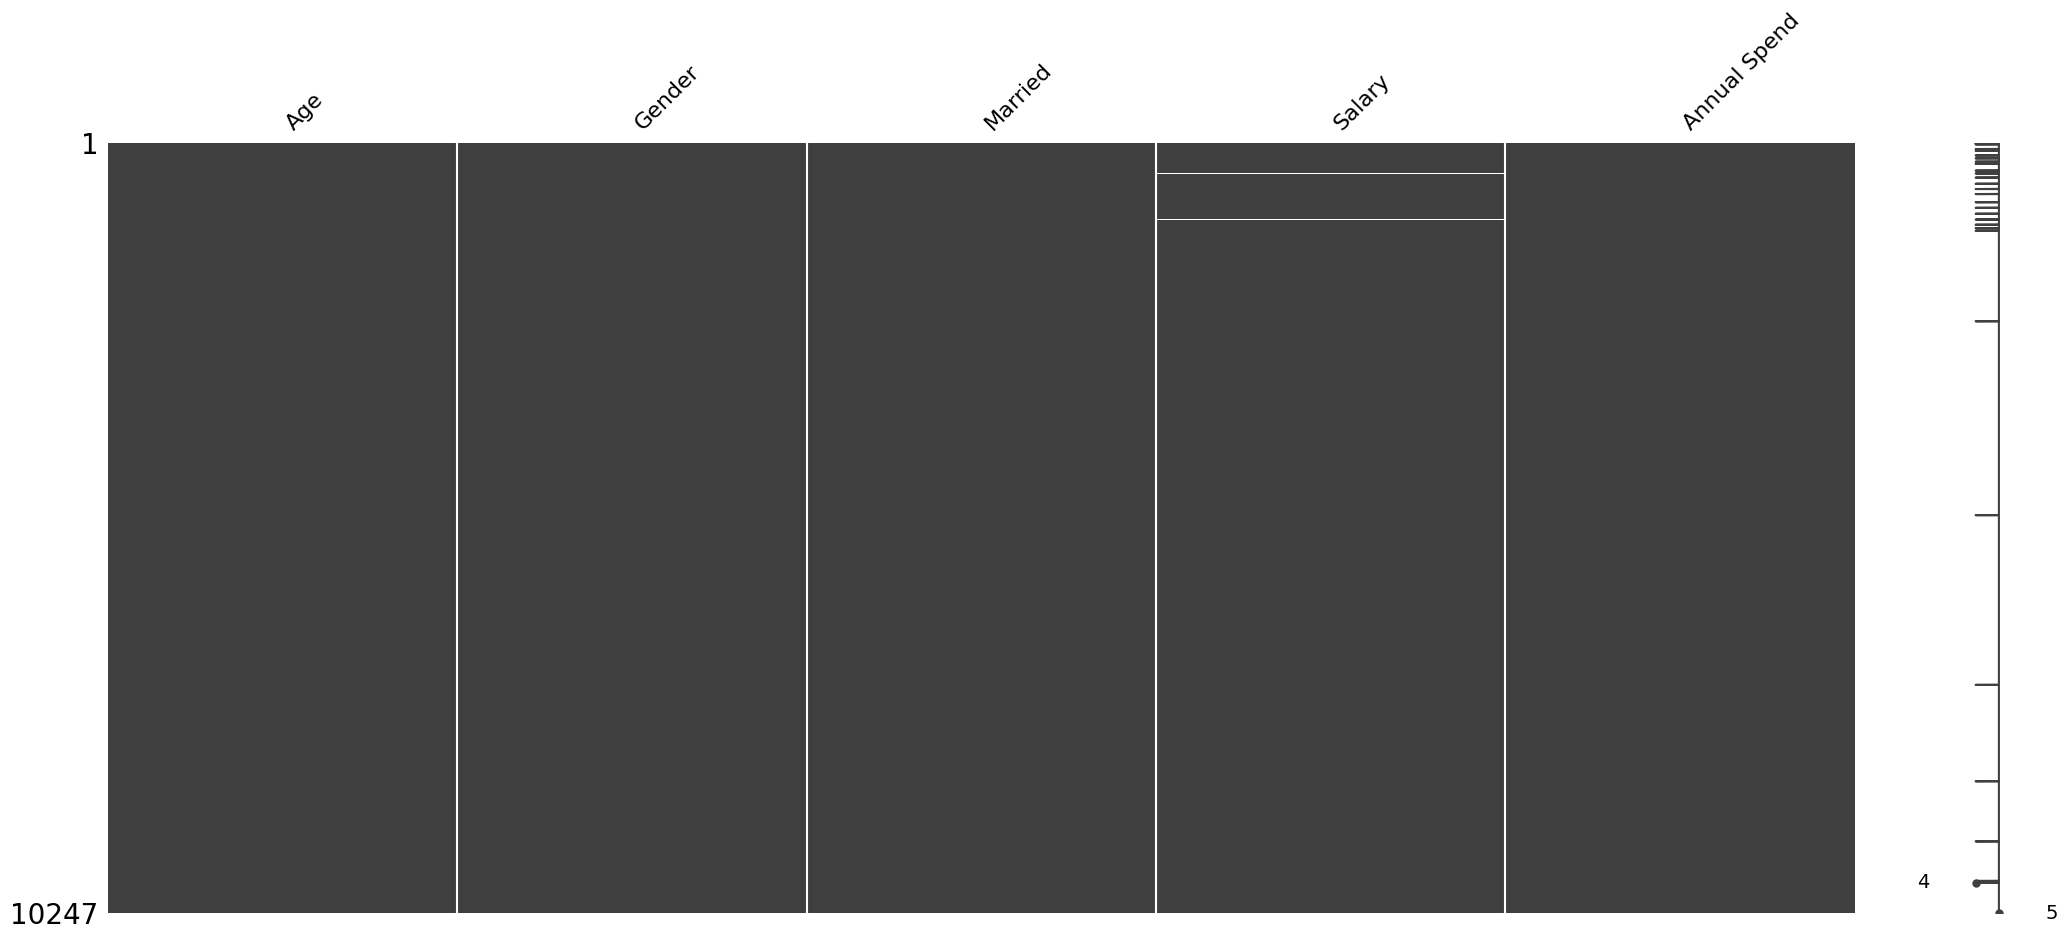

In [18]:
msno.matrix(input_df)

In [19]:
input_df.describe()

,Age,Salary,Annual Spend
count,10237.000000,10238.000000,10237.000000
mean,39.605578,36629.132727,2159.080891
std,15.151075,12319.692076,1145.668734
min,18.000000,13277.560000,100.000000
25%,26.400000,26769.782500,1164.050000
50%,35.000000,32908.195000,2411.220000
75%,52.800000,46211.522500,3092.040000
max,83.600000,71138.520000,4784.250000


In [20]:
input_df.isnull().sum()

Age             10
Gender           0
Married          0
Salary           9
Annual Spend    10
dtype: int64

<Axes: >

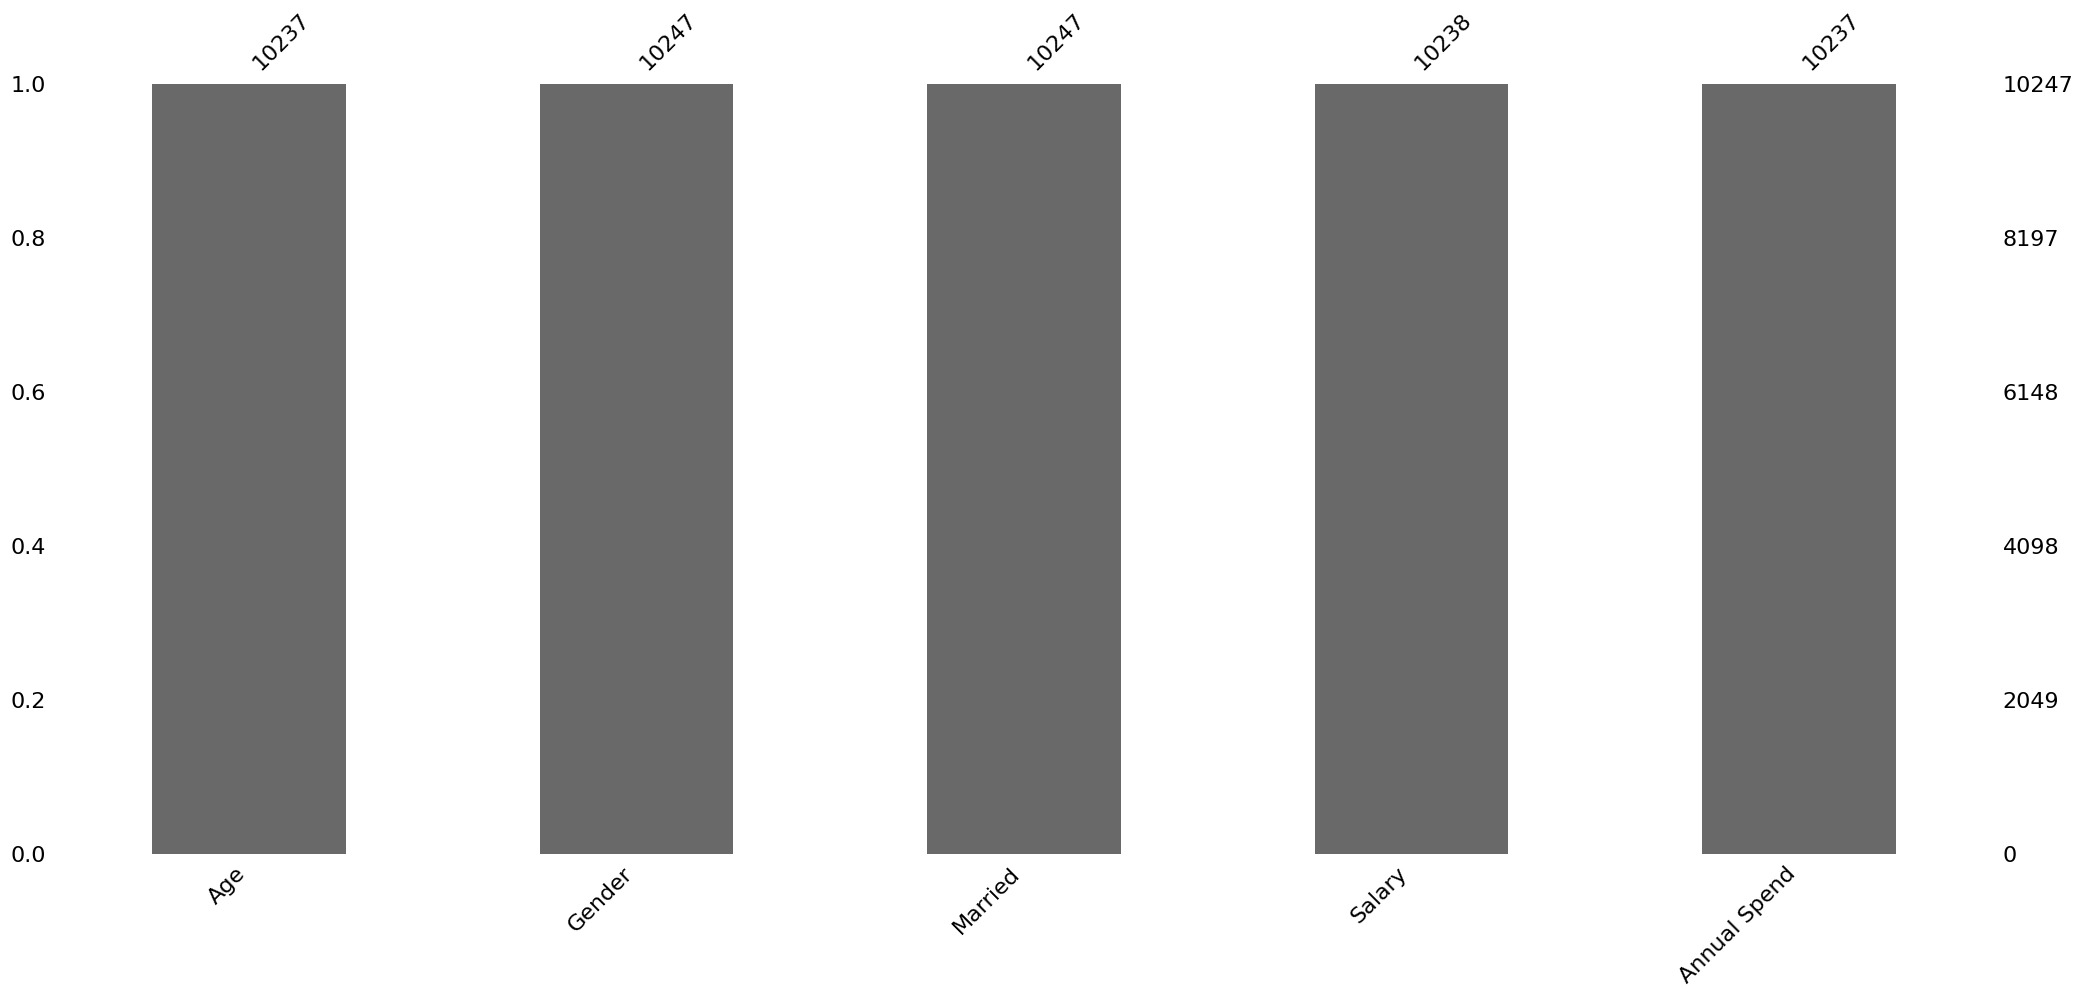

In [21]:
msno.bar(input_df)

In [22]:
input_df["Age"].fillna(input_df["Age"].mean(), inplace=True)
input_df["Salary"].fillna(input_df["Salary"].mean(), inplace=True)
input_df["Annual Spend"].fillna(input_df["Annual Spend"].mean(), inplace=True)

In [23]:
input_df.isnull().sum()

Age             0
Gender          0
Married         0
Salary          0
Annual Spend    0
dtype: int64

In [24]:
input_df.rename(columns={"Gender": "G", "Married" : "M"}, inplace=True)

In [25]:
input_df

,Age,G,M,Salary,Annual Spend
0,28.2,Male,Single,26908.950000,331.56
1,43.5,Female,Married,39366.440000,3071.18
2,27.7,Female,Single,36629.132727,1357.19
3,18.9,Male,Single,26235.550000,769.78
4,18.0,Male,Single,30822.140000,100.00
...,...,...,...,...,...
10242,23.8,Female,Single,24218.530000,1779.65
10243,26.6,Female,Single,26793.320000,2352.41
10244,22.1,Male,Single,29096.490000,410.25
10245,23.0,Female,Single,23437.990000,1945.92


In [27]:
input_df = pd.get_dummies(input_df, columns=["G", "M"])

In [28]:
input_df

,Age,Salary,Annual Spend,G_Female,G_Male,M_Married,M_Single
0,28.2,26908.950000,331.56,False,True,False,True
1,43.5,39366.440000,3071.18,True,False,True,False
2,27.7,36629.132727,1357.19,True,False,False,True
3,18.9,26235.550000,769.78,False,True,False,True
4,18.0,30822.140000,100.00,False,True,False,True
...,...,...,...,...,...,...,...
10242,23.8,24218.530000,1779.65,True,False,False,True
10243,26.6,26793.320000,2352.41,True,False,False,True
10244,22.1,29096.490000,410.25,False,True,False,True
10245,23.0,23437.990000,1945.92,True,False,False,True


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Salary', ylabel='Age'>,
        <Axes: xlabel='Annual Spend', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Salary'>,
        <Axes: xlabel='Salary', ylabel='Salary'>,
        <Axes: xlabel='Annual Spend', ylabel='Salary'>],
       [<Axes: xlabel='Age', ylabel='Annual Spend'>,
        <Axes: xlabel='Salary', ylabel='Annual Spend'>,
        <Axes: xlabel='Annual Spend', ylabel='Annual Spend'>]],
      dtype=object)

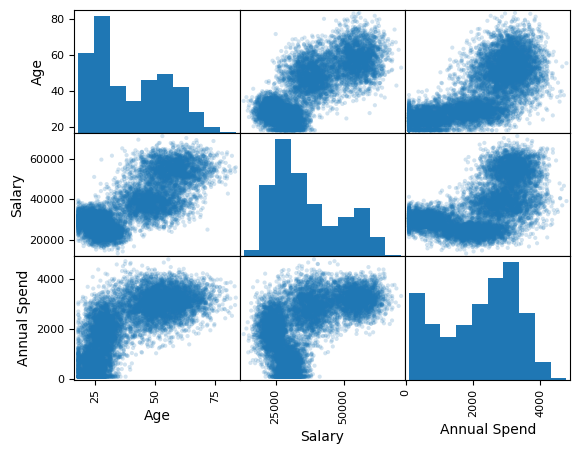

In [29]:
pd.plotting.scatter_matrix(input_df[["Age", "Salary", "Annual Spend"]], alpha=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler

def feature_standardize(df, features_to_be_standardized):
    df_standardized = df.copy()
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(df[features_to_be_standardized]), columns=features_to_be_standardized)
    df_standardized[features_to_be_standardized] = scaled_df
    return df_standardized, scaler.scale_, scaler.mean_

In [36]:
scaled_df, _, _ = feature_standardize(input_df, ["Age", "Salary", "Annual Spend", "G_Female", "G_Male", "M_Married", "M_Single"])

In [37]:
scaled_df

,Age,Salary,Annual Spend,G_Female,G_Male,M_Married,M_Single
0,-0.753194,-0.789381,-1.596013,-1.001465,1.001465,-0.986911,0.986911
1,0.257177,0.222298,0.796556,0.998537,-0.998537,1.013263,-1.013263
2,-0.786213,0.000000,-0.700309,0.998537,-0.998537,-0.986911,0.986911
3,-1.367342,-0.844068,-1.213306,-1.001465,1.001465,-0.986911,0.986911
4,-1.426776,-0.471589,-1.798240,-1.001465,1.001465,-0.986911,0.986911
...,...,...,...,...,...,...,...
10242,-1.043759,-1.007871,-0.331365,0.998537,-0.998537,-0.986911,0.986911
10243,-0.858854,-0.798771,0.168838,0.998537,-0.998537,-0.986911,0.986911
10244,-1.156022,-0.611730,-1.527292,-1.001465,1.001465,-0.986911,0.986911
10245,-1.096589,-1.071259,-0.186158,0.998537,-0.998537,-0.986911,0.986911


In [41]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=3, random_state=0).fit_predict(scaled_df)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
clusters[:20]

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1],
      dtype=int32)